<a href="https://colab.research.google.com/github/JayeshDabholkar/Walmart_case/blob/main/Walmart_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094"

In [ ]:
df =  pd.read_csv(url)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## **Descriptive Analysis**

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
# missing values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
#Average Purchase based on Gender
average_purchase_gender = df.groupby('Gender')['Purchase'].mean()
print(average_purchase_gender)

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


In [ ]:
df["Gender"] = df["Gender"].astype("category")
df["Age"] = df["Age"].astype("category")
df["City_Category"] = df["City_Category"].astype("category")
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype("category")

In [ ]:
# updated categories
df.dtypes

User_ID                          int64
Product_ID                      object
Gender                        category
Age                           category
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                   int64
Product_Category                 int64
Purchase                         int64
dtype: object

In [ ]:
# Visualisation on Gender and Purchase column for understanding data
df.Gender.value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [ ]:
#unique gender count

df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [ ]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

print()

age_counts = df['Age'].value_counts()
print(age_counts)

M    414259
F    135809
Name: Gender, dtype: int64

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


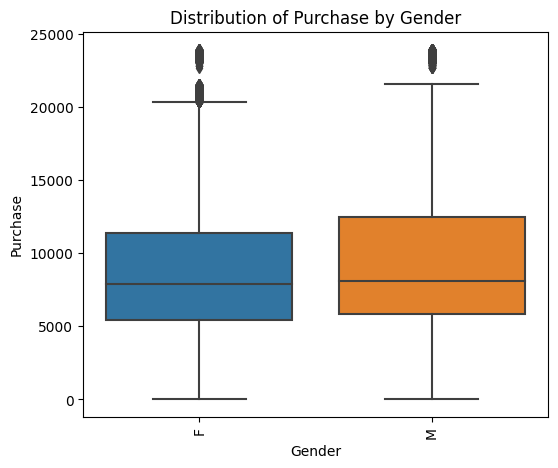

In [ ]:
# Visualize outliers using boxplots
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x = "Gender", y = "Purchase")
plt.title("Distribution of Purchase by Gender")
plt.xticks(rotation=90)
plt.show()

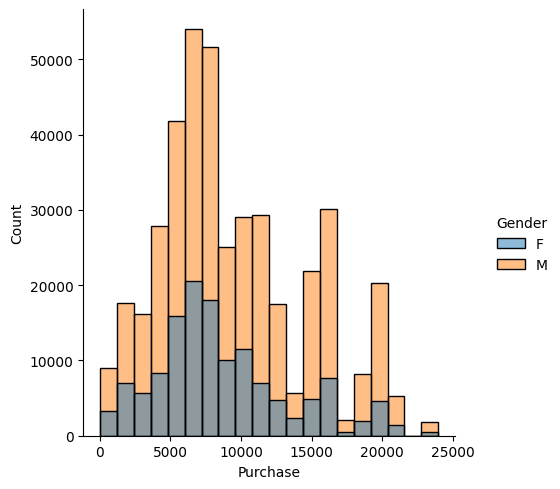

In [ ]:
sns.displot(x="Purchase", hue="Gender", data=df, bins=20)

In [ ]:
# 1 iteration random sampling
df.sample(250).groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,62.0,9245.532258,5132.950012,1666.0,6024.25,7853.0,11925.75,23784.0
M,188.0,9354.000000,5140.956354,49.0,6002.75,8051.5,11977.00,23582.0


In [ ]:
sample_size = 250
iterations = 1000

9442.718964


<ipython-input-33-86f85c463b1d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = male_spends, bins = 20)


<Axes: ylabel='Density'>

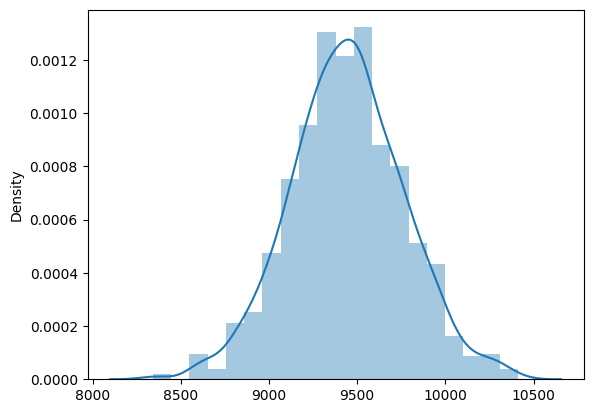

In [ ]:
male_spends = [df[df.Gender=='M'].sample(sample_size)['Purchase'].mean() for iter in range(iterations)]
print(np.mean(male_spends))
sns.distplot(x = male_spends, bins = 20)

8739.421524


<ipython-input-27-765ee94365e1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = female_spends, bins = 20)


<Axes: ylabel='Density'>

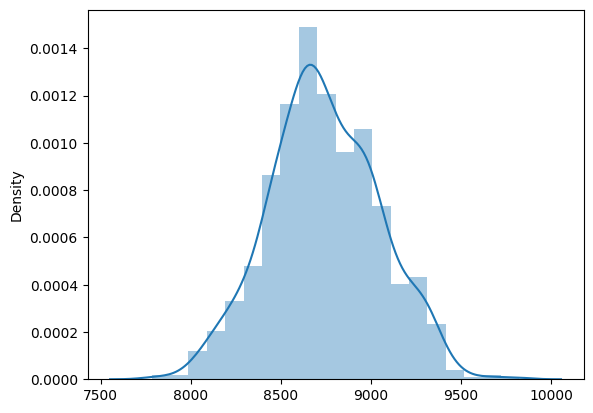

In [ ]:
female_spends = [df[df.Gender=='F'].sample(sample_size)['Purchase'].mean() for iter in range(iterations)]
print(np.mean(female_spends))
sns.distplot(x = female_spends, bins = 20)

In [ ]:
#Average Purchase based on Age
average_purchase_age = df.groupby('Age')['Purchase'].mean()
print(round(average_purchase_age, 2))

Age
0-17     8933.46
18-25    9169.66
26-35    9252.69
36-45    9331.35
46-50    9208.63
51-55    9534.81
55+      9336.28
Name: Purchase, dtype: float64


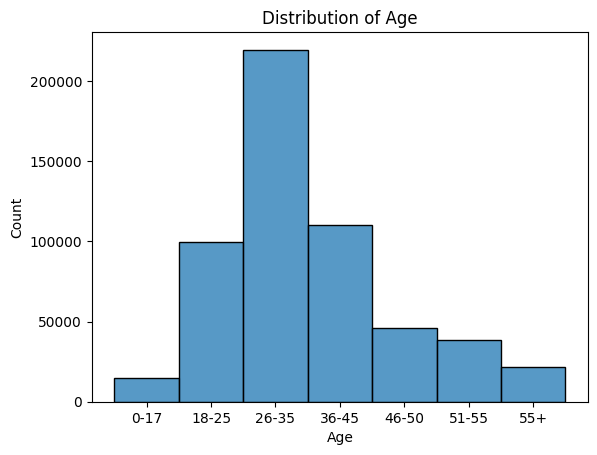

In [ ]:
sns.histplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

<ipython-input-7-e8709f367a37>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Purchase'], bins = 20)


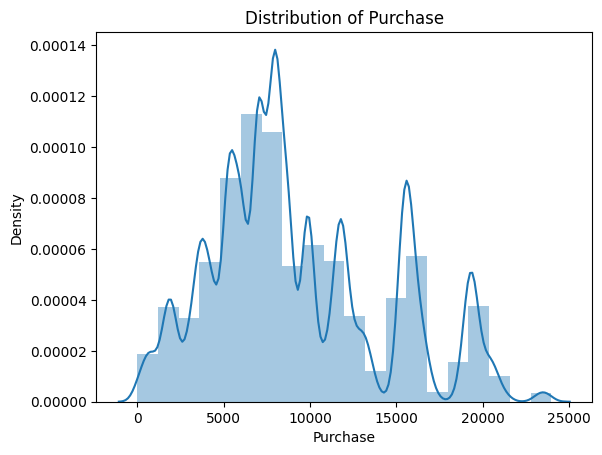

In [ ]:
sns.distplot(df['Purchase'], bins = 20)
plt.title('Distribution of Purchase')
plt.xlabel('Purchase')
plt.show()

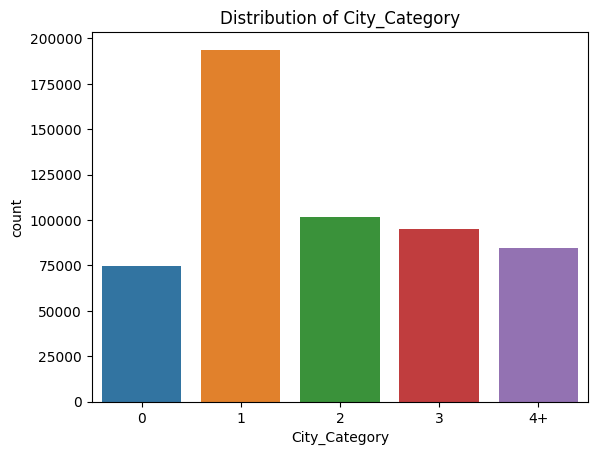

In [ ]:
sns.countplot(x = df['Stay_In_Current_City_Years'])
plt.title('Distribution of City_Category')
plt.xlabel('City_Category')
plt.show()

**Business Insights based on Non- Graphical and Visual Analysis**

1. Comments on the range of attributes

To analyze the range of attributes in the dataset, we can perform some basic exploratory data analysis (EDA) to understand the characteristics of the attributes.
We have both categorical and numeric data in walmart dataset


In [ ]:
attribute_names = df.columns.tolist()
print("List of attributes:")
print(attribute_names)
print()
numerical_attributes = df.describe()
print("Summary statistics for numerical attributes:")
print(numerical_attributes)

List of attributes:
['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase']

Summary statistics for numerical attributes:
            User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        1.000000          8.000000   
max    1.006040e+06      20.000000        1.000000         20.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.00

###Attributes observed in the provided data:
1. We can see that all the customers have a User_ID which is a unique ID.
2. Product_ID is also a unique ID assigned to a product that Walmart sells. The most sold product is P00265242.
3. Gender is given in M or F. There are mostly male customers in our data.
Age is given in the ranges for example 0-17, 18-25, 55+ etc. The most common age range we see in our data is 26-35.
4. Occupation is masked so it's hard to infer anything from this feature.
City categories are given in A, B and C. The most common occuring city in our data is B.
5. Products have different categories and have around 17 unique categories in our dataset.

###Comments on the distribution of the variables and relationship between them.
1. As we can see that product_id and user_id are unique. Each user_id can buy different products and can have different product_ids assigned.
2. We can see that the Gender and Marital status only have two values M or F and 0 or 1, 0 meaning unmarried and 1 meaning married.
3. Product_ID and product_category are related, because every product will come under a category.

##Comments for each univariate and bivariate plot:
###Univariate:

1. From the Gender Analysis, we can see that there are more Male customers than Female customers.
2. Age Analysis plot shows us that the maximum customers are from 26.35 age bracket, followed by 36-45 and 18-25.
3. We can infer from Occupation analysis plot that the highest occupation category is 4, followed by 0 and 7.
4. From City_Category_Analysis, we can observe that the people tend to live more in city B followed by city C.
5. From Stay_In_Current_City, Years_Analysis we can see that people don't tend to stay longer than 1 year in their current city.
6. There are more unmarried customers than the married ones.
7. The sales of the product category 5 is the most. 2nd highest sales of the type of product category is 1 followed by 8 which is the 3rd most sold category of the product.

###Bivariate:

1. We can see that the customers buy the category 1 product the most.
2. From the Age_Category vs Purchase plot, we can see that the highest purchase was made by the 26-35 age category.
3. Male customers have the highest purchase from Walmart.
4. Customers with occupation rating of 4 has the highest number of purchases followed by 0 type and then type 7 occupation rating.
5. The highest purchase was made by the City Category of B. 2nd most purchase was made by city category of C.
6. Unmarried customers have made the most purchases from Walmart than married customers.

##4. Answering questions

1. Are women spending more money per transaction than men? Why or Why not?

In [ ]:
amt_df = df.groupby(['User_ID','Gender'])[['Purchase']].sum()

amt_df = amt_df.reset_index()

amt_df['Gender'].value_counts()

F    5891
M    5891
Name: Gender, dtype: int64

In [ ]:
avg_purchase_male = amt_df[amt_df['Gender'] == 'M']['Purchase'].mean()
avg_purchase_female = amt_df[amt_df['Gender'] == 'F']['Purchase'].mean()

print("Average money spent by Males = {:.2f}".format(avg_purchase_male))
print("Average money spent by Females = {:.2f}".format(avg_purchase_female))

Average money spent by Males = 663653.05
Average money spent by Females = 201363.54


###2. Confidence intervals and distribution of the mean of the expenses by female and male customers

In [ ]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

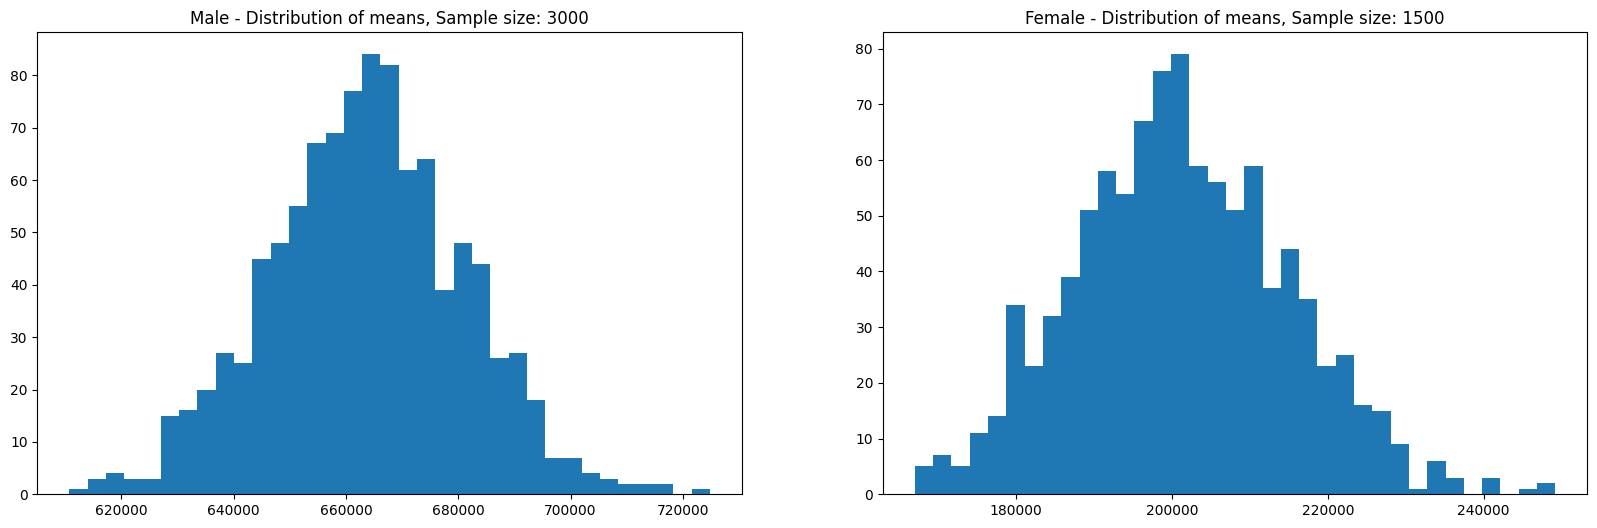

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

##6. Recommendations


1. Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
2. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
3. Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
4. Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45
5. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.